Módulo 5. Model Evaluation

Alumno: Enrique Ricardo García Hernández

Matrícula: A01315428

Fecha: 08 Nov 2022

Objetivos de aprendizaje:


1. Evaluación de modelos. Que tan bien se ajusta nuestro modelo entrenado al mundo real (out the sample data)
2. Sobre-ajuste, sub-ajuste y selección del modelo
3. Rigde regression
4. Selección de malla (grid selection) para la selección de hiperparámetros


In [1]:
#Librerías a usarse
import pandas as pd
import numpy as np

In [79]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [6]:
#Descargar la base de datos
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [8]:
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [9]:
#Sólo nos quedamos con la información numérica
df=df._get_numeric_data()
df.head(5)

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [10]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  width = 12
  height = 10
  plt.figure(figsize=(width, height))

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

  plt.title(Title)
  plt.xlabel('Price (in dollars)')
  plt.ylabel('Proportion of Cars')

  plt.show()
  plt.close()

In [11]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [15]:
#Training the model
y_data=df['price']
y_data.mean()

13207.129353233831

In [14]:
X_data=df.drop('price',axis=1)

In [22]:
#Selección de base train and validation
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=.1, random_state=1)

print("El número de observaciones de train es",X_train.shape[0])
print("El número de observaciones de test es",X_test.shape[0])

El número de observaciones de train es 180
El número de observaciones de test es 21


In [24]:
#Importamos las librerias de las regresiones
from sklearn.linear_model import LinearRegression
#Creamos el modelo
lre=LinearRegression()
lre.fit(X_train[['horsepower']],y_train)

LinearRegression()

In [26]:
#Calculamos la R^2 en la base de prueba
lre.score(X_test[['horsepower']],y_test)

0.36358755750788263

In [28]:
lre.score(X_train[['horsepower']],y_train)

0.6619724197515104

In [30]:
#Calcular la R^2 de la base que se entrenó con 60% (X_train1,y_train1)
X_train1,X_test1,y_train1,y_test1=train_test_split(X_data,y_data,train_size=.4,random_state=0)
lre.fit(X_train1[['horsepower']],y_train1)
lre.score(X_test1[['horsepower']],y_test1)

0.6553093930655154

In [32]:
#Como tenemos una muestra relativamente pequeña, usaremos Cross Validation
from sklearn.model_selection import cross_val_score

In [38]:
#Realizaremos el ejercicio con 4 folks
Rcross=cross_val_score(lre,X_train[['horsepower']],y_train,cv=4)
print('El valor promedio de la r^2 es',Rcross.mean(),'y su desviación estándar es',Rcross.std())

El valor promedio de la r^2 es 0.65381242843476 y su desviación estándar es 0.04861890320708136


In [43]:
#Calcular la media y desviación estándar para folk=2
Rcross2=cross_val_score(lre,X_train[['horsepower']],y_train,cv=2)
print('El valor promedio usando folk=2 es',Rcross2.mean(),'y la desviación estándar es',Rcross2.std())

El valor promedio usando folk=2 es 0.6572160359783692 y la desviación estándar es 0.01746963851286032


In [47]:
#Para predecir los valores de y
from sklearn.model_selection import cross_val_predict
yhat=cross_val_predict(lre,X_data[['horsepower']],y_data,cv=4)
yhat[0:5] #imprime las primeros 5 registros

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [49]:
#Segunda parte: Sobre-ajuste, sub-ajuste y selección de modelo
lr=LinearRegression()
base_X=X_train[['horsepower','curb-weight','engine-size','highway-mpg']]
lr.fit(base_X,y_train)

LinearRegression()

In [60]:
#Estimación de la predicción usando train
yhat_train=lr.predict(base_X)
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [53]:
y_train[0:5]

159     8058.0
16     36880.0
108    15580.0
31      5399.0
44     32250.0
Name: price, dtype: float64

In [56]:
#Predicción sobre la base test
yhat_test=lr.predict(X_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [57]:
y_test[0:5]

97      9549.0
117     6229.0
59     10245.0
35      7295.0
165     9989.0
Name: price, dtype: float64

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


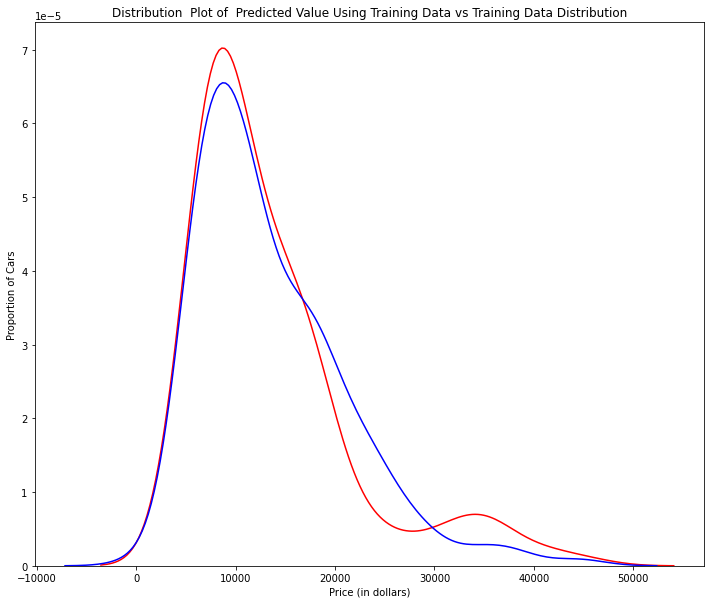

In [61]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


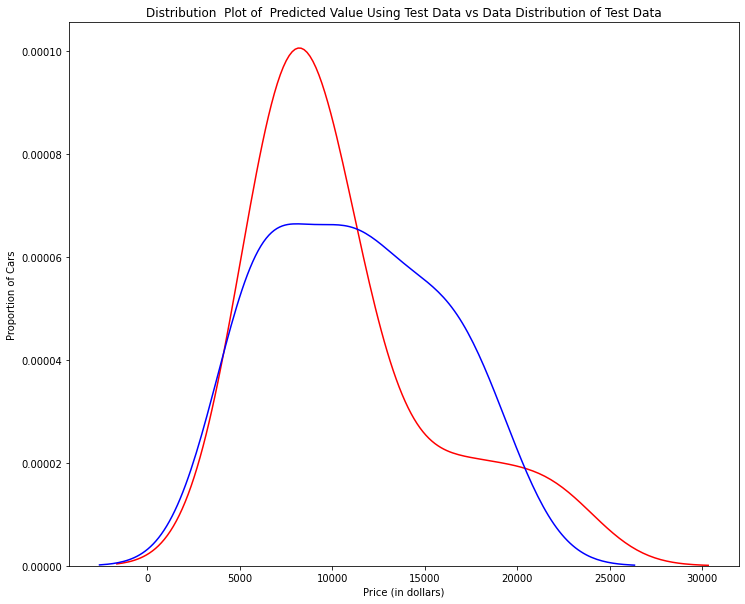

In [62]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

El modelo NO se ajusta bien para la población test ==> El modelo está sub-ajustado

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
#Sobreajuste
x_train,x_test,y_train,y_test=train_test_split(X_data,y_data,test_size=.45,random_state=0)

In [70]:
#Calcularemos una regresión de grado 5 para la variable 'horsepower'
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [71]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [72]:
yhat=poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [73]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


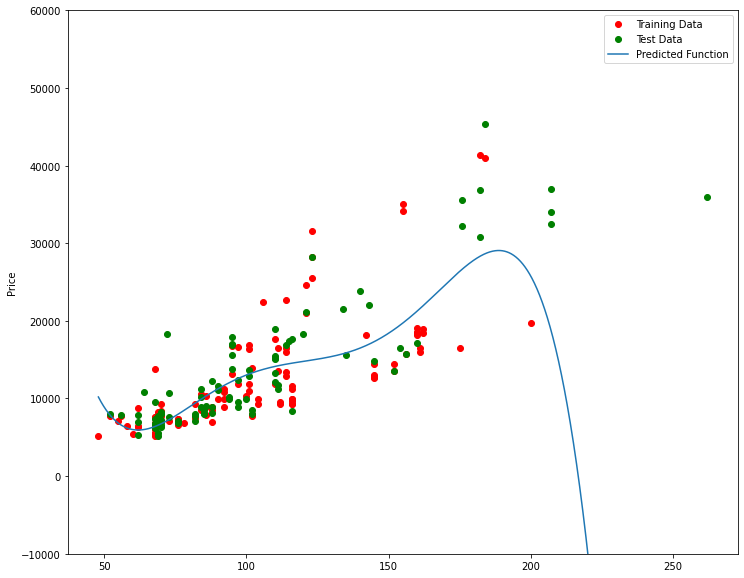

In [82]:
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

In [86]:
#Calcular la R2 de de pr de train
poly.score(x_train_pr,y_train)

0.556771690212023

In [87]:
#Calcular la R2 del modelo pr de test
poly.score(x_test_pr,y_test)

-29.87134030204415

El resultado con orden= 1 es 0.7325101750243117
El resultado con orden= 2 es 0.7405858710699899
El resultado con orden= 3 es 0.7406204232729607
El resultado con orden= 4 es 0.40639663604384924


Text(3, 0.75, 'Maximum R^2 ')

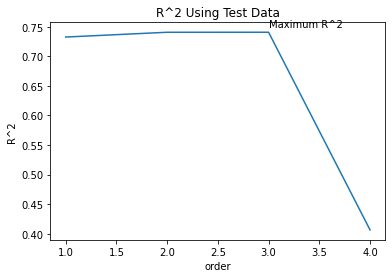

In [103]:
#La R2 negativa en test es muestra de overfitting
#Veamos como cambia la R2 para diferentes grados de transformación
#inicializo la matriz
rsqu_test=[]
order=[1,2,3,4]
for orden in order:
  pr=PolynomialFeatures(degree=orden)
  x_train_pr=pr.fit_transform(x_train[['horsepower']])
  x_test_pr=pr.fit_transform(x_test[['horsepower']])
  lr.fit(x_train_pr,y_train)
  #Matriz con los resultados
  rsqu_test.append(lr.score(x_test_pr,y_test))
  print('El resultado con orden=',orden,'es',lr.score(x_test_pr,y_test))

plt.plot(order, rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [106]:
#Ridge
pr=PolynomialFeatures(degree=2)
variables=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']
x_train_pr=pr.fit_transform(x_train[variables])
x_test_pr=pr.fit_transform(x_test[variables])

In [122]:
from sklearn.linear_model import Ridge

In [123]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr,y_train)

Ridge(alpha=1)

In [111]:
yhat=RigeModel.predict(x_test_pr)

In [120]:
#Visualizamos los 4 primeros valores
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [128]:
RigeModel.score(x_train_pr, y_train)

0.8709772896440416

In [129]:
#Buscaremos el valor de Alpha que minimiza el error
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:05<00:00, 193.84it/s, Test Score=0.564, Train Score=0.859]


In [131]:
#Realizamos un ejercicio con alpha=10 usando las variables transformadas
RigeModel=Ridge(alpha=10)
RigeModel.fit(x_train_pr,y_train)
RigeModel.score(x_test_pr,y_test)


0.5418576440206702

In [137]:
#Haremos Grid search para encontrar el alpha que minimiza el error
from sklearn.model_selection import GridSearchCV
parametro=[{'alpha':[.001,.01,.1,1,10,100,1000,10000,100000]}]
parametro

[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [138]:
RR=Ridge()
Grid1=GridSearchCV(RR,parametro,cv=4)

In [140]:
#Ajustamos el modelo
Grid1.fit(X_data[variables],y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [142]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [147]:
BestRR.score(X_data[variables],y_data)

0.8087733947961774

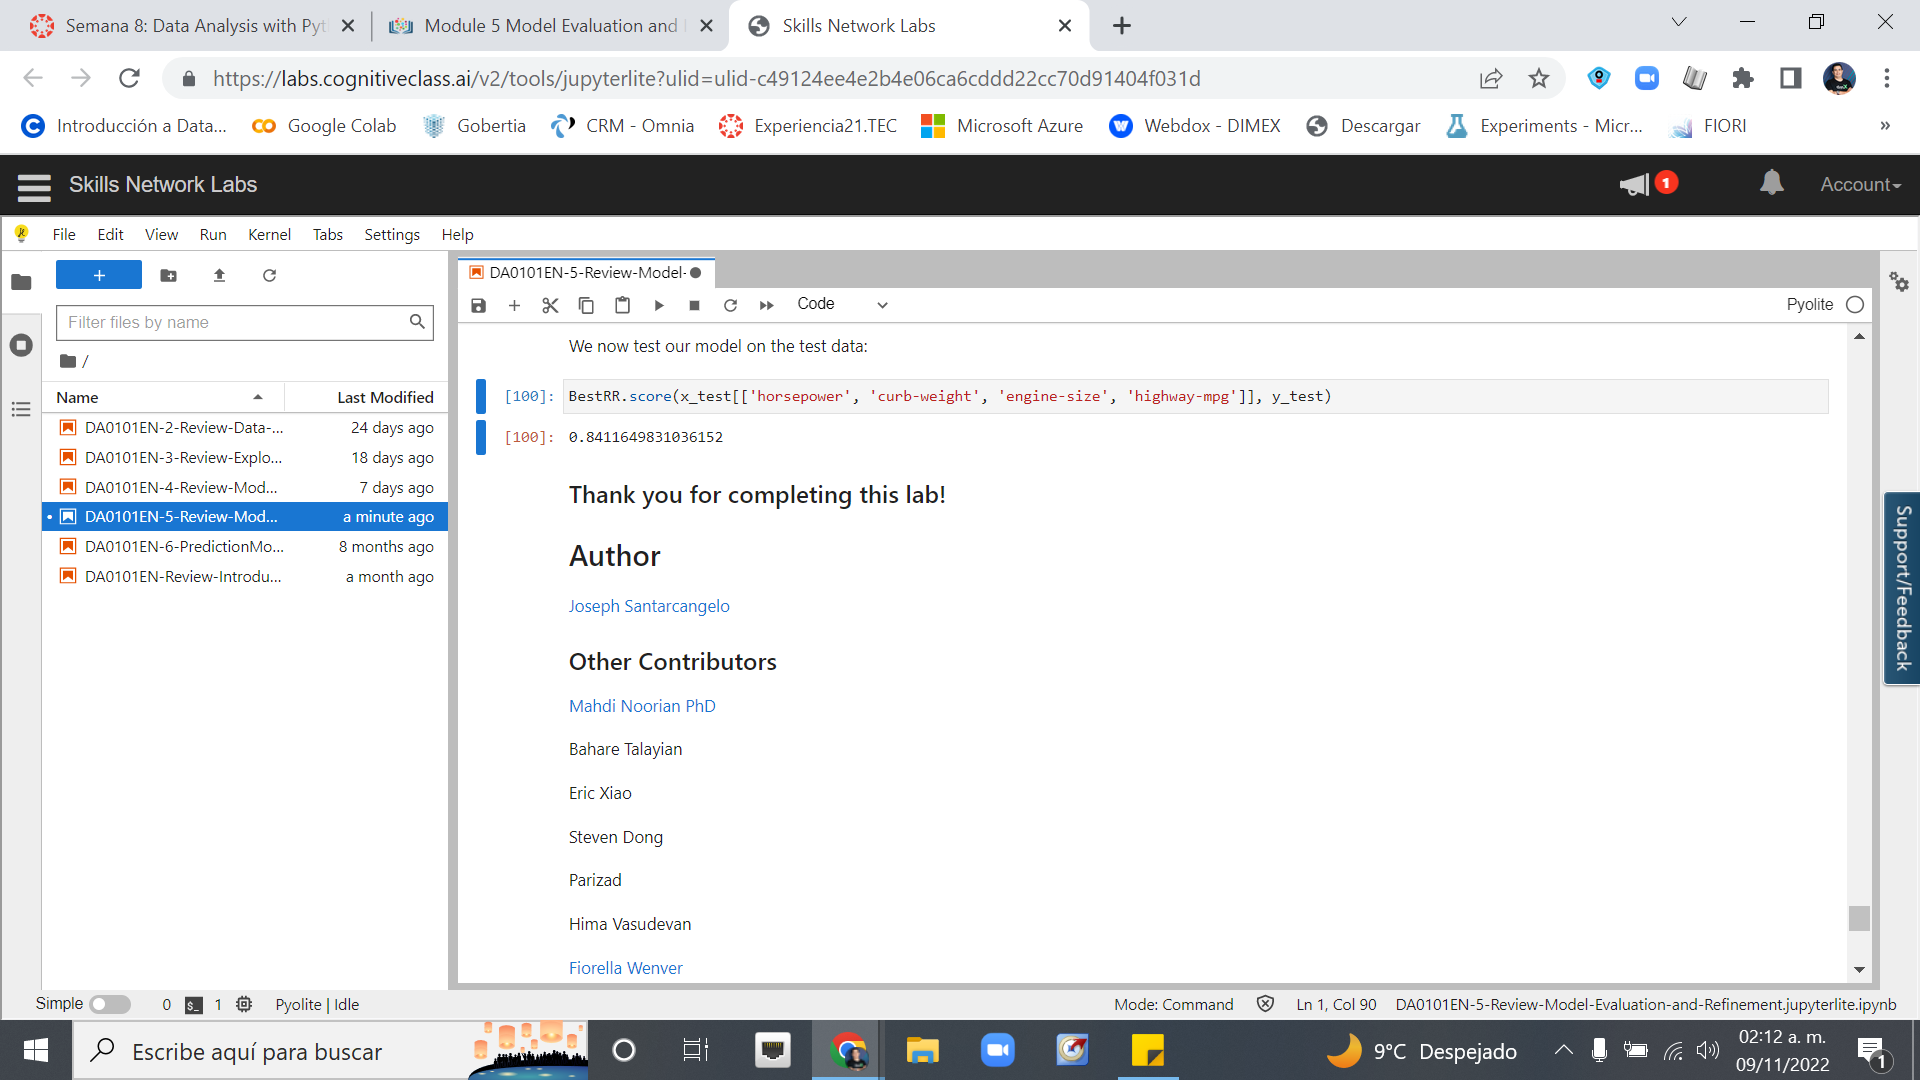

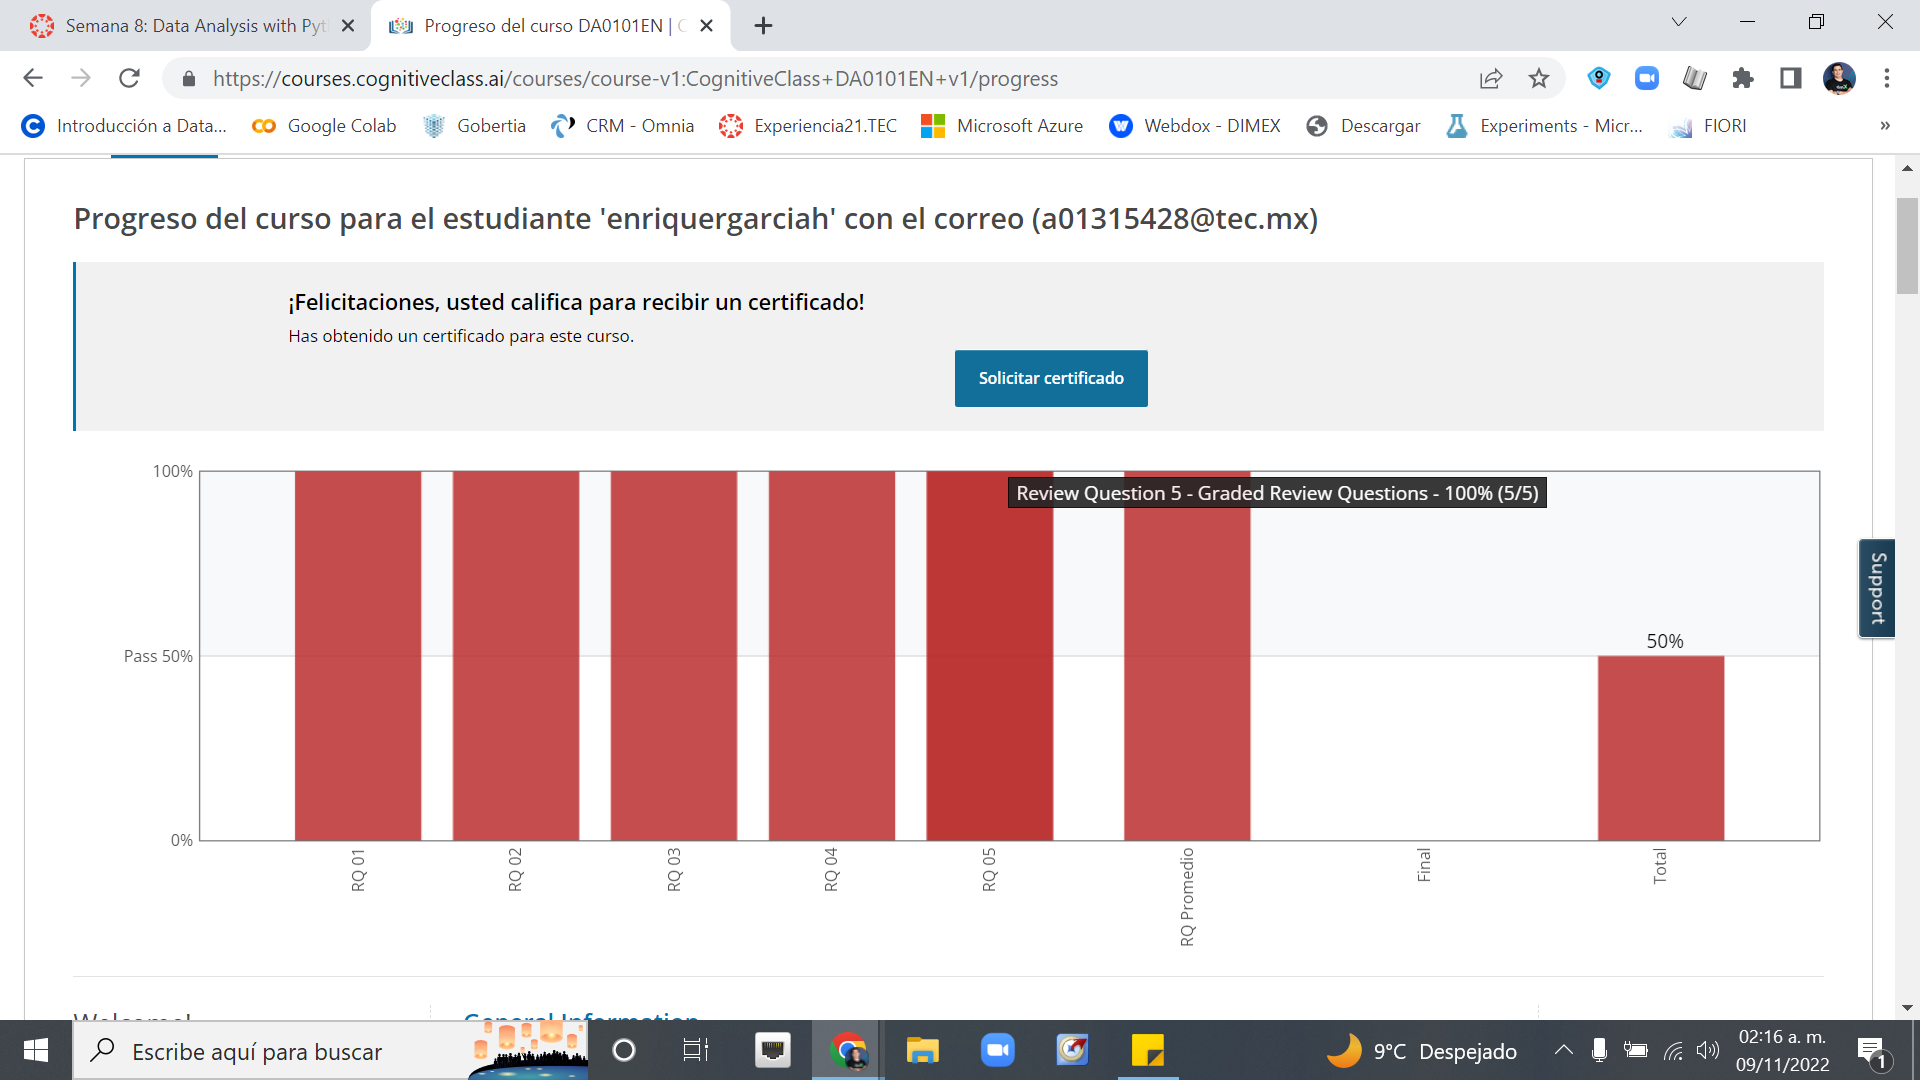

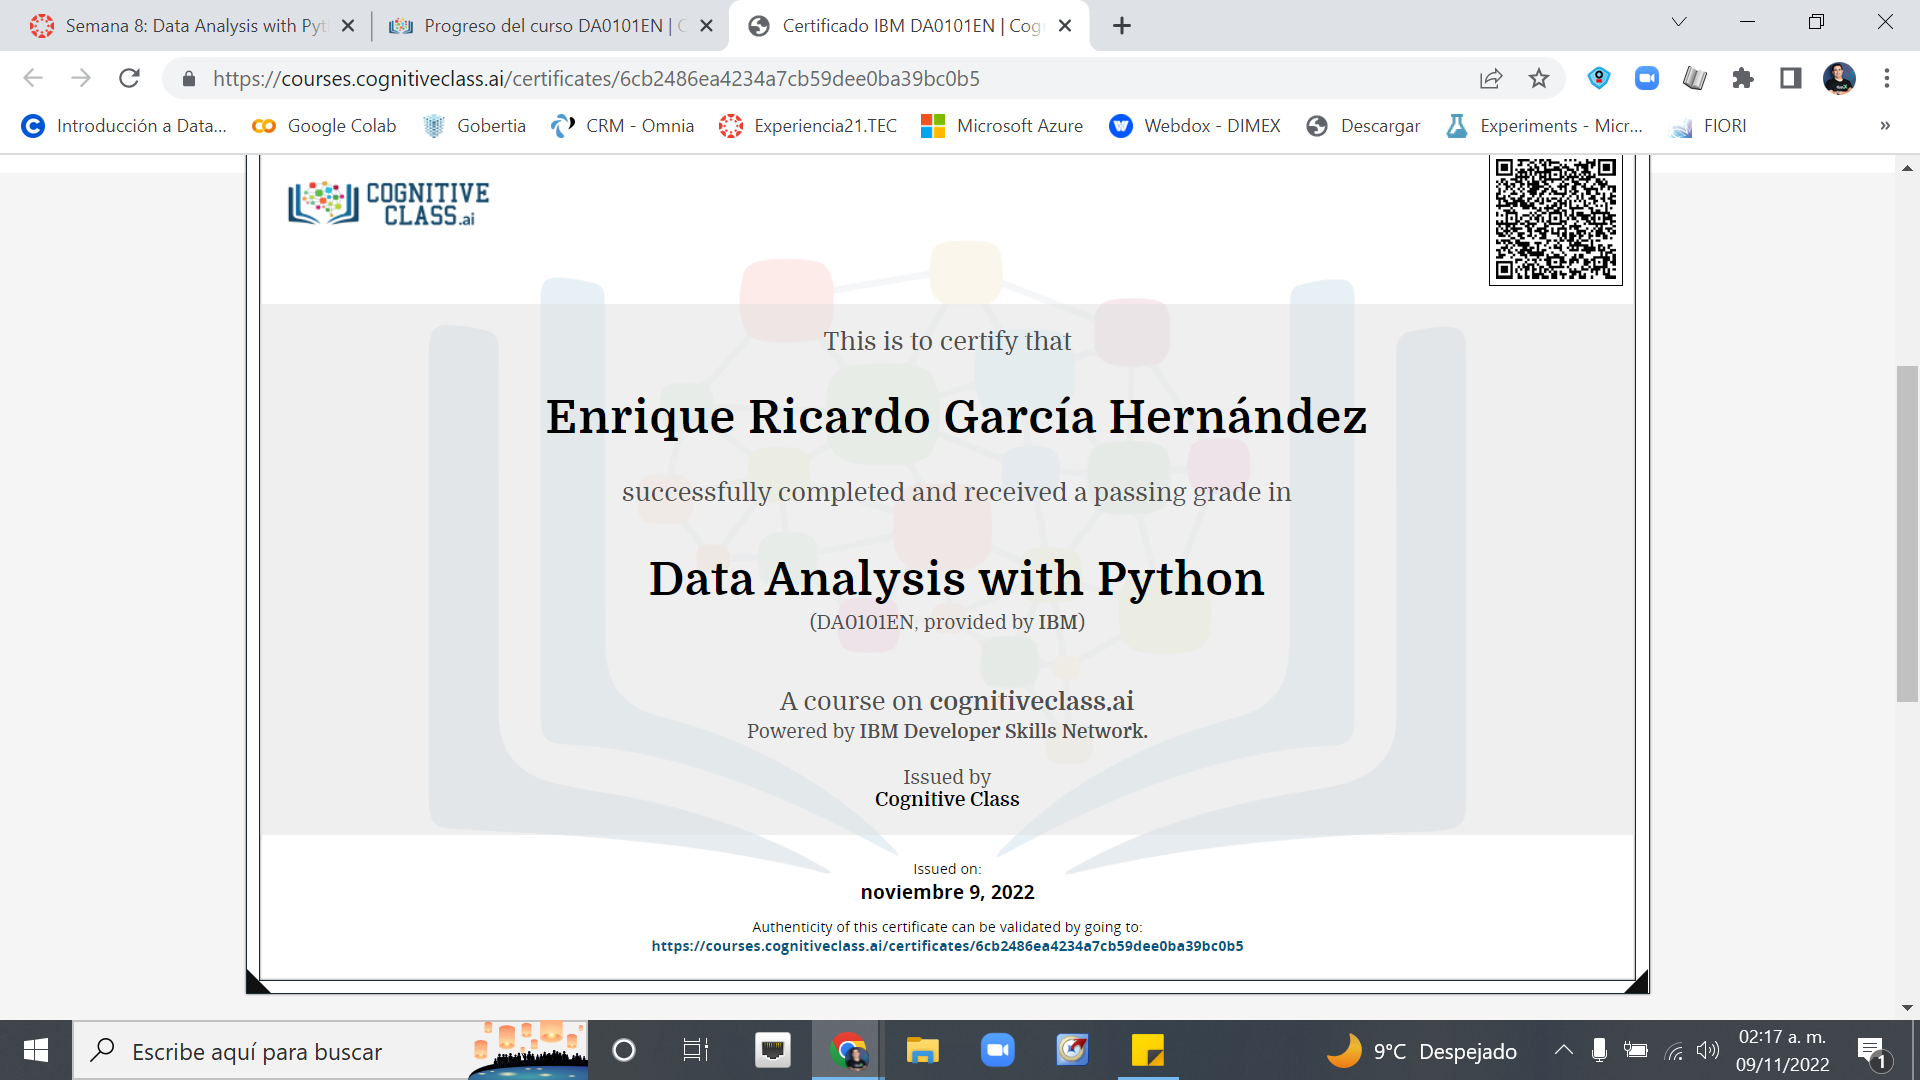